Introduction to Transpiling

Routing Stage

Text(0, 0.5, 'Counts')

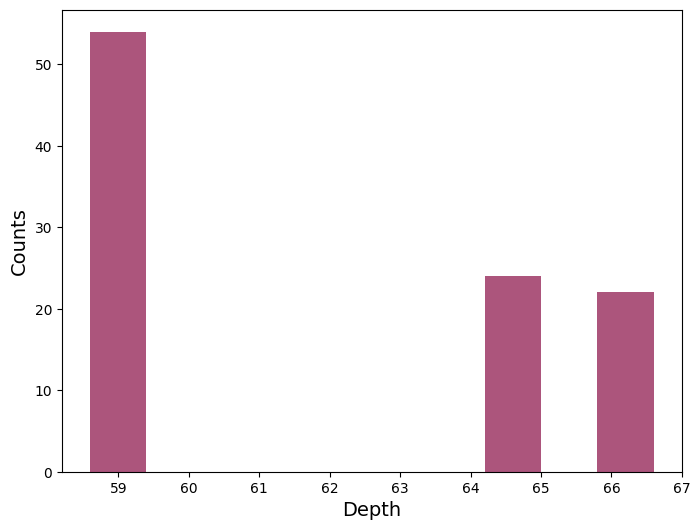

In [3]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAuckland, FakeWashingtonV2
from qiskit.transpiler import generate_preset_pass_manager
 
backend = FakeAuckland()
 
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
for seed in range(100):
    pass_manager = generate_preset_pass_manager(
        optimization_level=1,
        backend=backend,
        layout_method="trivial",  # Fixed layout mapped in circuit order
        seed_transpiler=seed,  # For reproducible results
    )
    depths.append(pass_manager.run(ghz).depth())
 
plt.figure(figsize=(8, 6))
plt.hist(depths, align="left", color="#AC557C")
plt.xlabel("Depth", fontsize=14)
plt.ylabel("Counts", fontsize=14)

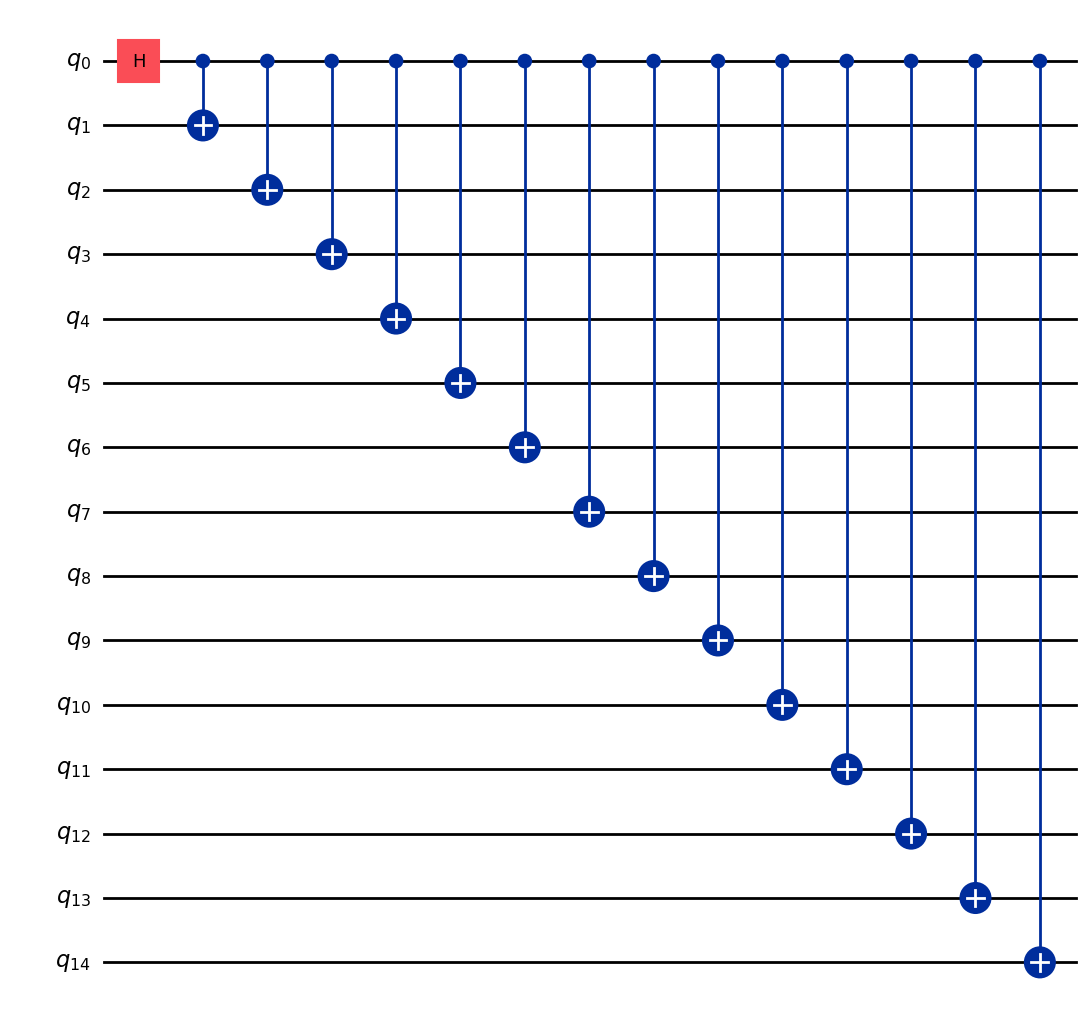

In [4]:
ghz.draw("mpl", idle_wires=False)

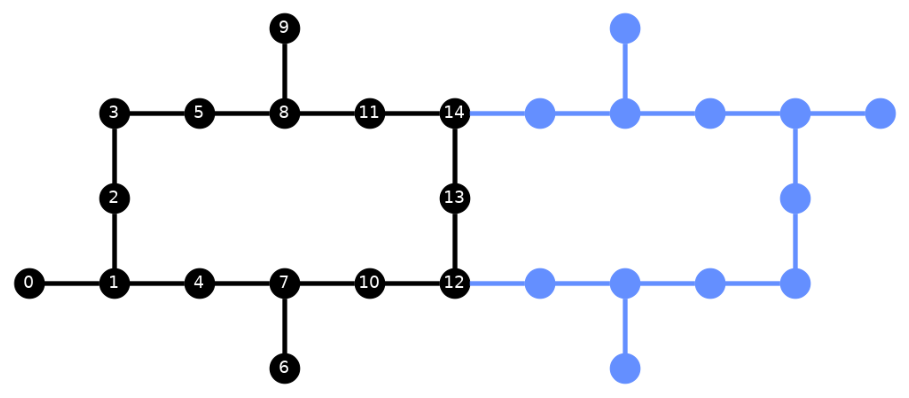

In [5]:
from qiskit.visualization import plot_circuit_layout
 
# Plot the hardware graph and indicate which hardware qubits were chosen to run the circuit
transpiled_circ = pass_manager.run(ghz)
plot_circuit_layout(transpiled_circ, backend)

Translation Stage

native gates:['cx', 'delay', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']


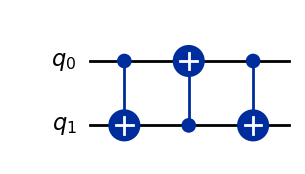

In [6]:
print("native gates:" + str(sorted(backend.operation_names)))
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.decompose().draw("mpl")

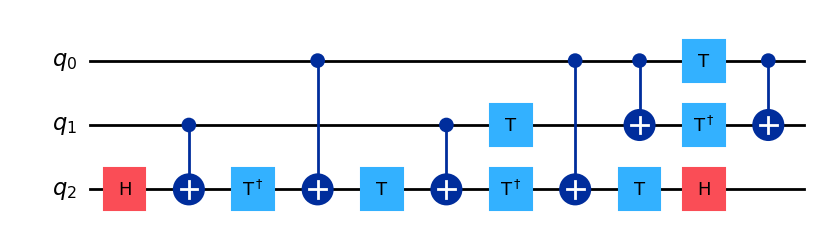

In [7]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.decompose().draw("mpl")

Optimization Stage

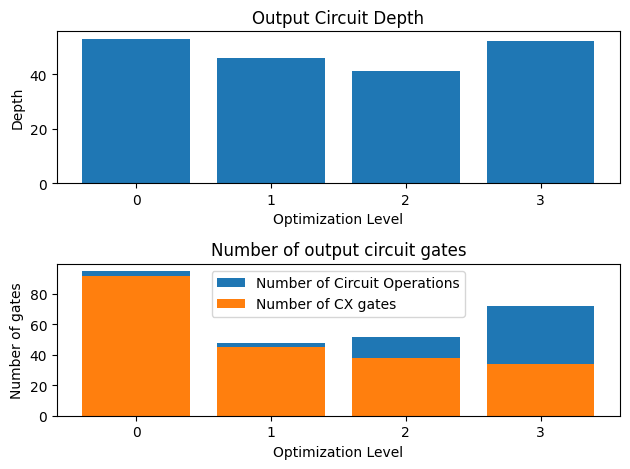

In [8]:
ghz = QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
gate_counts = []
multiqubit_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
    pass_manager = generate_preset_pass_manager(
        optimization_level=level,
        backend=backend,
        seed_transpiler=1234,
    )
    circ = pass_manager.run(ghz)
    depths.append(circ.depth())
    gate_counts.append(sum(circ.count_ops().values()))
    multiqubit_gate_counts.append(circ.count_ops()["cx"])
 
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label="Depth")
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")
ax2.bar(levels, gate_counts, label="Number of Circuit Operations")
ax2.bar(levels, multiqubit_gate_counts, label="Number of CX gates")
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")
fig.tight_layout()
plt.show()

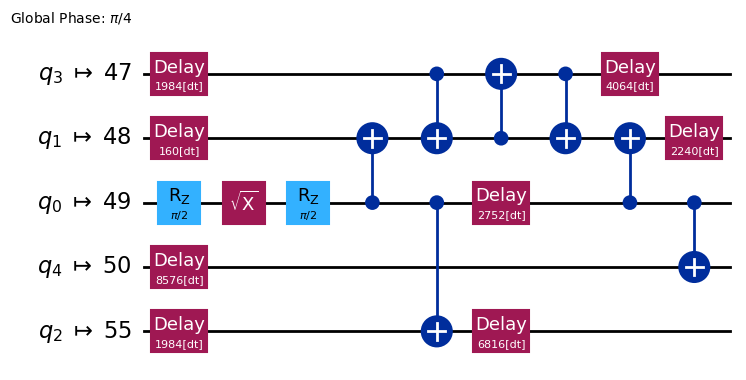

In [9]:
ghz = QuantumCircuit(5)
ghz.h(0)
ghz.cx(0, range(1, 5))
 
 
# Use fake backend
backend = FakeWashingtonV2()
 
# Run with optimization level 3 and 'asap' scheduling pass
pass_manager = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    scheduling_method="asap",
    seed_transpiler=1234,
)
 
 
circ = pass_manager.run(ghz)
circ.draw(output="mpl", idle_wires=False)